In [15]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

In [16]:
learning_rate=[0.05,0.005,0.0005]
training_epochs=[100,500,1000]
display_step = 50

In [17]:
train_X=numpy.asarray([1,2,4,3,5])
train_Y=numpy.asarray([1,3,3,2,5])
n_samples = train_X.shape[0]

In [18]:
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(0.0, name="weight")
b = tf.Variable(0.0, name="bias")

In [19]:
def processData(learning_rate,training_epochs):
    print("LEARNING RATE=",learning_rate,"\t Epoch=",training_epochs,"\n\n")
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)

    # Fit all training data
        for epoch in range(training_epochs):
            for (x, y) in zip(train_X, train_Y):
                sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
            if (epoch+1) % display_step == 0:
                c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
                print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

        print ("Optimization Finished!")
        training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
        print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
        plt.plot(train_X, train_Y, 'ro', label='Original data')
        plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()

LEARNING RATE= 0.05 	 Epoch= 100
Epoch: 0050 cost= 0.242040664 W= 0.844209 b= 0.280501
Epoch: 0100 cost= 0.241635278 W= 0.838333 b= 0.303215
Optimization Finished!
Training cost= 0.241635 W= 0.838333 b= 0.303215 



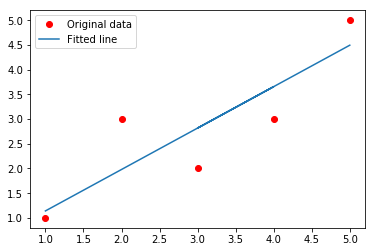

LEARNING RATE= 0.005 	 Epoch= 500
Epoch: 0050 cost= 0.253590971 W= 0.801722 b= 0.229982
Epoch: 0100 cost= 0.242115974 W= 0.840568 b= 0.247629
Epoch: 0150 cost= 0.241937876 W= 0.840941 b= 0.254299
Epoch: 0200 cost= 0.241786718 W= 0.839436 b= 0.260173
Epoch: 0250 cost= 0.241646916 W= 0.837899 b= 0.265778
Epoch: 0300 cost= 0.241518334 W= 0.836421 b= 0.271148
Epoch: 0350 cost= 0.241399959 W= 0.835004 b= 0.276296
Epoch: 0400 cost= 0.241291076 W= 0.833647 b= 0.281229
Epoch: 0450 cost= 0.241190821 W= 0.832345 b= 0.285958
Epoch: 0500 cost= 0.241098478 W= 0.831098 b= 0.290491
Optimization Finished!
Training cost= 0.241098 W= 0.831098 b= 0.290491 



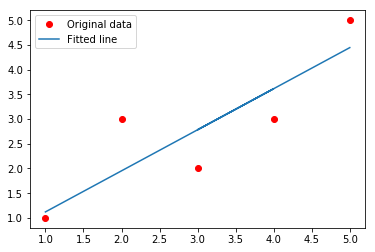

LEARNING RATE= 0.0005 	 Epoch= 1000
Epoch: 0050 cost= 2.763422012 W= 0.216575 b= 0.0607586
Epoch: 0100 cost= 1.636874437 W= 0.377605 b= 0.106124
Epoch: 0150 cost= 1.013715386 W= 0.497323 b= 0.140039
Epoch: 0200 cost= 0.669012606 W= 0.586316 b= 0.165437
Epoch: 0250 cost= 0.478338063 W= 0.652456 b= 0.184501
Epoch: 0300 cost= 0.372862905 W= 0.7016 b= 0.198852
Epoch: 0350 cost= 0.314515531 W= 0.738104 b= 0.209698
Epoch: 0400 cost= 0.282236010 W= 0.765206 b= 0.217936
Epoch: 0450 cost= 0.264375299 W= 0.785317 b= 0.224233
Epoch: 0500 cost= 0.254489601 W= 0.800227 b= 0.229086
Epoch: 0550 cost= 0.249014854 W= 0.81127 b= 0.232865
Epoch: 0600 cost= 0.245979548 W= 0.819436 b= 0.235844
Epoch: 0650 cost= 0.244293362 W= 0.825464 b= 0.238227
Epoch: 0700 cost= 0.243353397 W= 0.8299 b= 0.240166
Epoch: 0750 cost= 0.242825776 W= 0.833154 b= 0.241775
Epoch: 0800 cost= 0.242526248 W= 0.835528 b= 0.243136
Epoch: 0850 cost= 0.242352799 W= 0.837248 b= 0.244314
Epoch: 0900 cost= 0.242249161 W= 0.838482 b= 0.245

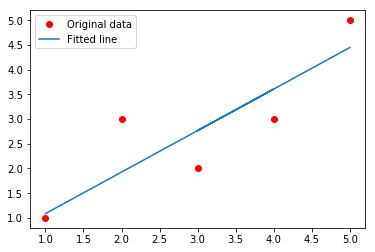

In [22]:
pred = tf.add(tf.multiply(X, W), b)
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
for (x,y) in zip(learning_rate,training_epochs):
    processData(x,y)